## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
combined_data_df.shape

(1893, 8)

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice = combined_data_df[combined_data_df.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]
#duplicate_mice["Mouse ID"].unique()

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]
duplicate_mice["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice["Mouse ID"])==False]
clean_combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
group_drug_regiment_df = clean_combined_data_df.groupby("Drug Regimen")
mean = group_drug_regiment_df["Tumor Volume (mm3)"].mean()
median = group_drug_regiment_df["Tumor Volume (mm3)"].median() 
variance = group_drug_regiment_df["Tumor Volume (mm3)"].var()
standard_deviation = group_drug_regiment_df["Tumor Volume (mm3)"].std()
sem = group_drug_regiment_df["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean": mean,"Median": median,
                                   "Variance":variance,"Standard Deviation":standard_deviation,
                                    "SEM":sem})
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Create a group based on the values in the 'Mouse ID' column and Count how many times each Mouse ID appears in our group
mice_per_treatment = group_drug_regiment_df["Mouse ID"].nunique()
mice_per_treatment

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

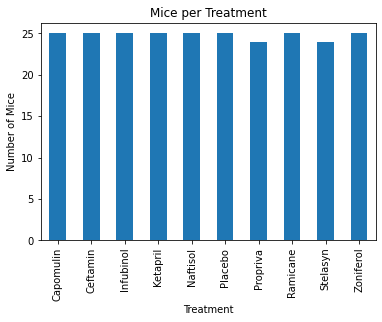

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Create a bar chart based off of the group series from before
mice_per_treatment_pandas = mice_per_treatment.plot(kind='bar')

# Set the xlabel and ylabel using class methods
mice_per_treatment_pandas.set_xlabel("Treatment")
mice_per_treatment_pandas.set_ylabel("Number of Mice")
plt.title("Mice per Treatment")
plt.show()
plt.tight_layout()

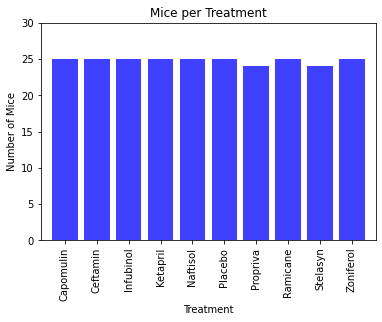

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(0, len(mice_per_treatment))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(mice_per_treatment)-.25)
plt.ylim(0, max(mice_per_treatment) + 5)

plt.bar(x_axis, mice_per_treatment, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, mice_per_treatment.index, rotation = "vertical")
plt.show()


In [14]:
mice_gender = clean_combined_data_df[["Mouse ID", "Sex"]].drop_duplicates()
mice_gender

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


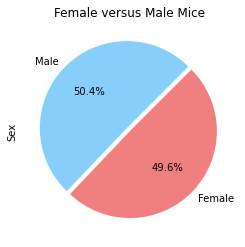

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_gender = clean_combined_data_df[["Mouse ID", "Sex"]]
colors = ["lightskyblue", "lightcoral"]
explode=(0.05,0)
gender_breakdown = mice_gender["Sex"].value_counts()
pandas_pie = gender_breakdown.plot(kind="pie", title="Female versus Male Mice", 
                                   autopct="%1.1f%%",startangle=45, explode=explode, colors = colors)

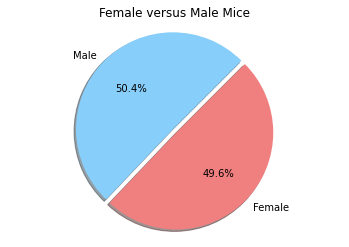

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
colors = ["lightskyblue", "lightcoral"]
explode = (0.05, 0)
plt.title("Female versus Male Mice")
plt.pie(gender_breakdown, explode=explode, labels=gender_breakdown.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_combined_data_df.groupby("Mouse ID")["Timepoint"].max()
timepoint = timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint_df = pd.merge(clean_combined_data_df, timepoint,
                                 how='outer', on='Mouse ID')
merge_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Create for loop
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for treatments in treatments_list:

    tumor_vol_last_timepoint_df = merge_timepoint_df.loc[merge_timepoint_df["Drug Regimen"] == treatments]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol_last_timepoint_df)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_last_timepoint_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_tumor_vol = tumor_vol_last_timepoint_df.loc[(tumor_vol_last_timepoint_df < lower_bound) | (tumor_vol_last_timepoint_df > upper_bound)]

    outlier_tumor_vol   


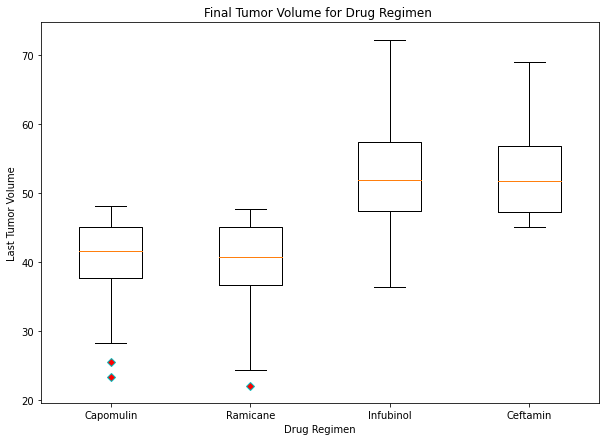

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_dot = dict(markerfacecolor="r", marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize = (10,7))
ax1.set_title('Final Tumor Volume for Drug Regimen ')
ax1.set_ylabel('Last Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data,flierprops=red_dot)
ax1.xaxis.set(ticks = range(1,len(treatments_list)+1),ticklabels = treatments_list)
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
